# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

Установить параметры, которые влияют на рыночную стоимость объекта недвижимости. Эти параметры позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед установкой параметров понадобится обзор данных.

Проверим данные на ошибки, аномалии, наличие дублей, пропусков и оценим их влияние на исследование. Затем, на этапе предобработки исправим самые критичные ошибки данных, если это возможно.

Таким образом, исследование пройдёт в три этапа:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных, выявлений зависимостей и корреляций.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import os
from textwrap import dedent
from IPython import get_ipython

In [2]:
if os.path.exists('/datasets/real_estate_data.csv'):
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
else:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем общую информацию по таблице.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переименуем колонку `cityCenters_nearest`.

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

Построим гистограммы по каждому столбцу.

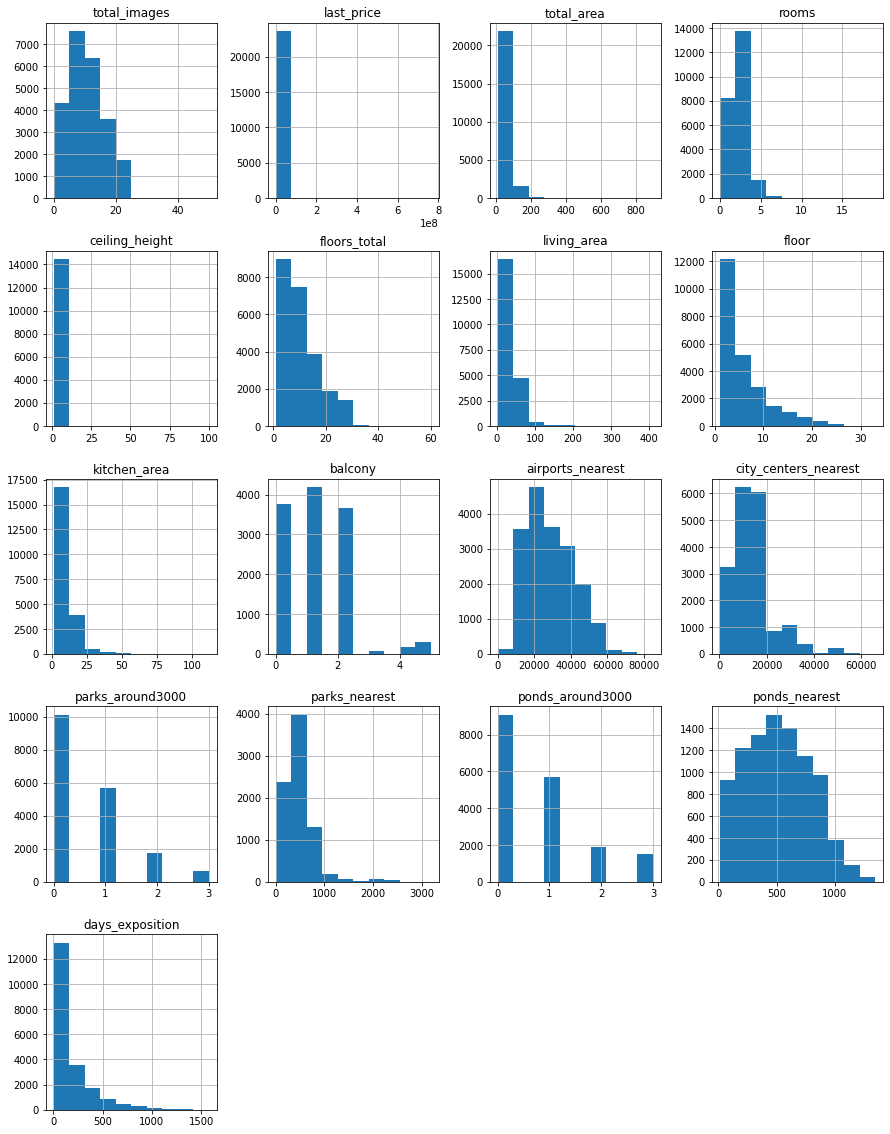

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца.

In [6]:
#data.isna().sum()
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Больше всего пропущенных значений в столбце is_apartment (около 90% значений не заполнены). Также много пропущенных значений в столбцах balcony, parks_nearest, ponds_nearest, ceiling_height.

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. То же самое касается признака, определяющего является ли квартира аппартаментами или нет. Пропущенное значение, скорее всего, означает, что объект не является аппартаментами.

In [7]:
data['balcony'] = data['balcony'].fillna(0) 
data['is_apartment'] = data['is_apartment'].fillna(False)

Проанализируем связь пропусков в столбцах parks_around3000 и ponds_around3000 с пропусками в столбцах parks_nearest и ponds_nearest.
Пропуск в столбцах с количеством парков/водоемов в радиусе 3 км, скорее всего, означает, что парков/водоемов в радиусе 3 км нет.

In [8]:
raws = ((data['ponds_around3000'].isna() == True) | (data['ponds_around3000'] == 0.0)) & (data['ponds_nearest'].isna() == False)
display(data.loc[raws].head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [9]:
raws = ((data['parks_around3000'].isna() == True) | (data['parks_around3000'] == 0.0)) & (data['parks_nearest'].isna() == False)
display(data.loc[raws].head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,False,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Гипотеза подтвердилась: там, где не заполнено количество парков/водоемов, почти всегда не заполнено и расстояние. Исключение составляют 4 строки с парками в радиусе, превышающем 3 км.
Пустые значения в колонках с количеством можно привести к 0, расстояние в данном случае логично оставить как есть.

In [10]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Строки с незаполненным столбцом locality_name лучше удалить: их немного, а столбец важный. Заполнить пропуски корректно невозможно.

In [11]:
data = data.dropna(subset=['locality_name'])

Заполним пропуски в столбце с высотой потолка медианным значением по этому населенному пункту, удалить их нельзя - процент незаполненных значений большой.

In [12]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Пропуски в столбцах с количеством этажей в доме, жилой площадью, площадью кухни скорее всего возникли из-за необяазательности или отсутствии этих полей в форме объекта. Заполнить их нулями было бы неправильно. Заполнять медианными значениями тоже не верно, поскольку дома могут быть старыми и новыми, площади в различных планировках могут сильно отличаться.
Не заполненные значения в расстояниях до центра города и аэропорта также могут следствием необязательности заполнения полей.
Отсутствие значений в столбце с количеством дней размещения объявления может быть либо следствием незаполнения поля или ошибки сохранения значения, либо эти объекты еще были выставлены на продажу на момент сбора данных.
Удалим строки с пустым столбцом floors_total: их всего 86 строк, процент от общей выборки небольшой. При этом далее в анализе невозможно будет по этим строкам определить тип этажа - первый, последний, другой.

In [13]:
data = data.dropna(subset=['floors_total'])

#### Изменение типов данных

Изменим тип данных в столбце с первым днем публикации на дату для дальнейшего вычисления дня неделели продажи, месяца и года. Также изменим вещественный тип данных в столбцах `last_price` и `floors_total` на целочисленный с помощью метода `astype()`.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

#### Обработка дублей

Явных дублей нет.

In [15]:
print(data.duplicated().sum())

0


Но есть неявные дубликаты в столбце с названиями населенных пунктов.

In [16]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Но есть неявные дубликаты в столбце с названиями населенных пунктов:
* посёлок Пансионат Зелёный Бор
* поселок Пансионат Зелёный Бор
* поселок Рябово
* поселок городского типа Рябово
Обработаем столбец: заменим "посёлок", "посёлок городского типа", "поселок городского типа" на "поселок".

In [17]:
def delete_location_duplicates(row):
    if 'посёлок' in str(row):
        return row.replace('посёлок', 'поселок')
    elif 'поселок городского типа' in str(row):
        return row.replace('поселок городского типа', 'поселок')
    elif 'посёлок городского типа' in str(row):
        return row.replace('посёлок городского типа', 'поселок')
    else:
        return row
        
data['locality_name'] = data['locality_name'].apply(delete_location_duplicates)

Выведем статистическое описание данных для столбцов для поиска аномальных значений.

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.0,14.0,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4646000.0,6790000.0,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.0,69.7,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.0,3.0,19.0
ceiling_height,23565.0,2.733882e+00,1.012187e+00,1.0,2.55,2.7,2.7,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.0,16.0,60.0
living_area,21700.0,3.445482e+01,2.204536e+01,2.0,18.60,30.0,42.3,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.0,8.0,33.0
kitchen_area,21343.0,1.056099e+01,5.900630e+00,1.3,7.00,9.1,12.0,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.00,0.0,1.0,5.0


Слишком большой разброс значений в столбах с ценой: от 12 тыс до 7 трл. Нули в столбцах с количеством комнат (возможно, это продажа комнаты). Высота потолков от 1,26м до 100м. Странные значения в столбце с жилой площадь: минимум 2кв.м, - то же с площадью кухни. Есть объекты со слишком большим периодом продажи: больше 4 лет.

Проанализируем столбец с высотой потолков.

In [19]:
display(data.sort_values(by='ceiling_height', ascending=False).head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
21377,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
17857,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,NaN,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0


В столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м
Вряд ли есть объекты, в которых высота потолков больше 10.3 м. При этом у квартиры с высотой потолков 100м общая площадь всего 25 м. кв. Предположим, что это квартира с высотой потолков 10м. Обычно квартиры с высокими потолками имеют и большую площадь, следовательно запись не корректна.
Минимальной высотой потолков считается 2,4м, записей с высотой до 2.4м немного.
Разделим на 10 все значения больше 20м, некорректные записи удалим.

In [20]:
data = data[data['ceiling_height'] != 100]

def get_normal_ceiling_height(row):
    # проверка на NaN
    if row != row:
        return row
    elif row > 20:
        return row / 10
    else:
        return row
    
data['ceiling_height'] = data['ceiling_height'].apply(get_normal_ceiling_height)
data = data[data['ceiling_height'] <= 10.3]
data = data[data['ceiling_height'] >= 2.4]

Проанализируем столбец с ценой.

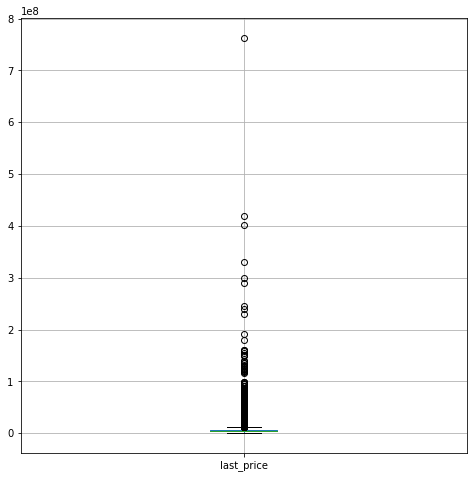

In [21]:
data.boxplot(column='last_price', figsize=(8,8));

Судя по графику, некоторые значения цены значительно превосходят нормальные значения. Могла быть нарушена размерность, например, цены указаны не в рублях, а в копейках, или есть ошибки в сборе показателей. Проверим, какую долю составляют объекты с неправдоподобной ценой, если их меньше 10%, удалим их.
Также есть строки с неправдоподобно маленькой ценой - 12190.

In [22]:
display(data.sort_values(by='last_price').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
14911,5,430000,54.0,2018-06-26,2,2.70,3,NaN,3,False,...,NaN,0,поселок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0
17456,7,430000,30.4,2019-04-22,1,2.50,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
16274,18,440000,40.0,2018-07-10,1,2.70,5,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0
16219,14,450000,38.5,2018-07-11,2,2.65,2,NaN,1,False,...,NaN,0,деревня Вахнова Кара,NaN,NaN,0.0,NaN,0.0,NaN,45.0


Строка с неправдобподобно малой ценой одна, удалим ее.

In [23]:
data = data[data['last_price'] != 12190]

In [24]:
data.query('last_price >= 10_000_000').shape[0]

2757

Строк со стоимостью выше 10 млн ~8%. Удалим их, посмотрим на распределение.

In [25]:
data = data.query('400_000 <= last_price <= 10_000_000')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,20840.0,9.654079e+00,5.505588e+00,0.0,6.00,9.0,13.00,39.0
last_price,20840.0,4.649907e+06,1.966585e+06,430000.0,3300000.00,4320000.0,5800000.00,10000000.0
total_area,20840.0,5.209991e+01,1.778830e+01,12.0,38.70,48.0,62.00,201.5
rooms,20840.0,1.900672e+00,8.947273e-01,0.0,1.00,2.0,3.00,7.0
ceiling_height,20840.0,2.674956e+00,2.045522e-01,2.4,2.55,2.7,2.70,10.3
floors_total,20840.0,1.073229e+01,6.616726e+00,1.0,5.00,9.0,16.00,60.0
living_area,19246.0,2.988750e+01,1.278667e+01,2.0,18.00,29.0,38.50,112.0
floor,20840.0,5.851967e+00,4.887792e+00,1.0,2.00,4.0,8.00,33.0
kitchen_area,18875.0,9.442062e+00,3.632763e+00,1.3,7.00,9.0,11.00,64.0
balcony,20840.0,5.893474e-01,9.295351e-01,0.0,0.00,0.0,1.00,5.0


### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем столбы, связанные с датами:
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [26]:
data['price_per_area'] = data['last_price'] / data['total_area']
data['first_day_exposition_day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['first_day_exposition_day_of_week1'] = data['first_day_exposition'].astype('datetime64[D]').dt.dayofweek
data['first_day_exposition_month1'] = data['first_day_exposition'].astype('datetime64[M]')
data['first_day_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['first_day_exposition_year1'] = data['first_day_exposition'].astype('datetime64[Y]')
data['living_total_ratio'] = data['living_area'] / data['total_area']

def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'
    
data['floor_type'] = data.apply(floor_type, axis=1)
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data['living_total_ratio'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_area,first_day_exposition_day_of_week,first_day_exposition_day_of_week1,first_day_exposition_month1,first_day_exposition_month,first_day_exposition_year,first_day_exposition_year1,living_total_ratio,floor_type,city_centers_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,82920.792079,1,1,2018-12-01,12,2018,2018-01-01,0.460396,first,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,92785.714286,3,3,2015-08-01,8,2015,2015-01-01,0.612500,other,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,100000.000000,1,1,2018-06-01,6,2018,2018-01-01,0.320000,other,8.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,False,...,95065.789474,0,0,2018-09-01,9,2018,2018-01-01,0.473684,other,NaN
6,6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,False,...,99195.710456,3,3,2017-11-01,11,2017,2017-01-01,0.284182,other,19.0


### Исследовательский анализ данных

Построим гистограммы распределения для столбов first_day_exposition_month, first_day_exposition_month, first_day_exposition, parks_nearest, airports_nearest, floor_type, ceiling_height, floor_total, last_price, total_area, living_area, kitchen_area и days_exposition.


* Построим гистограмму для столбца "first_day_exposition_month"


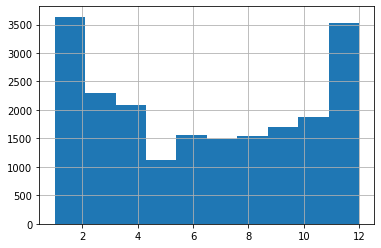

In [27]:

data["first_day_exposition_month"].hist();



Вывод:
больше всего публикаций случается в январе и декабре. В мае, июне публикаций намного меньше.



* Построим гистограмму для столбца "first_day_exposition_day_of_week"


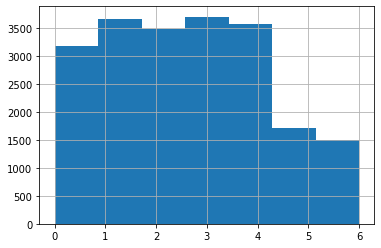

In [28]:

data["first_day_exposition_day_of_week"].hist(bins=7);



Больше всего публикаций происходит в рабочие дни (лидирует вторник, четверг). В выходные публикаций значительно меньше, чем в будние.



* Построим гистограмму для столбца "parks_nearest"


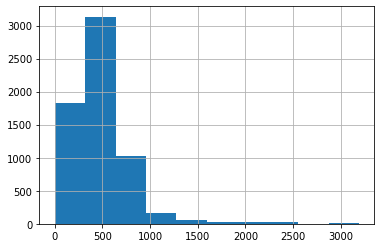

In [29]:

data["parks_nearest"].hist();


Для большинства объектов парк находится в 300-600 метрах.



* Построим гистограмму для столбца "airports_nearest"


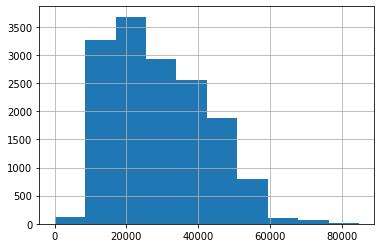

In [30]:

data["airports_nearest"].hist();



Для большинства объектов аэропорт находится в 20 км.



* Построим гистограмму для столбца "city_centers_nearest"


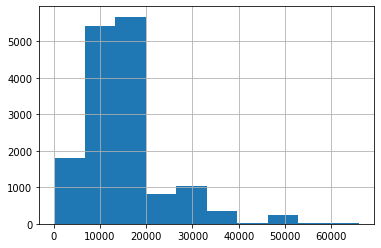

In [31]:

data["city_centers_nearest"].hist();


Большая часть объектов находится в 8-20 км от центра.


* Построим гистограмму для столбца "first_day_exposition"


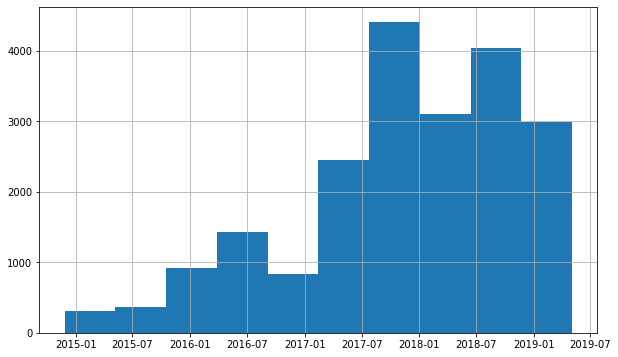

In [32]:

data["first_day_exposition"].hist(figsize=(10,6), bins=10);


Количество объявлений год от года увеличивалось, достигая максимальных значений во второй половине 2017 и второй половине 2018 года.


* Построим гистограмму для столбца "floor_type"


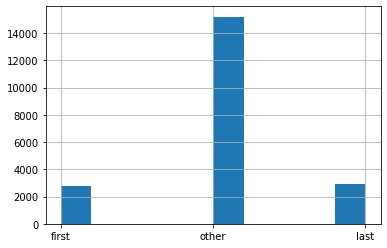

In [33]:

data["floor_type"].hist();


Большая часть объектов находится ни на первом, ни на последнем этаже. Объектов на первом и последнем этаже примерно в 5 раз меньше, чем на этажах от 2 до предпоследнего.


* Построим гистограмму для столбца "floor"


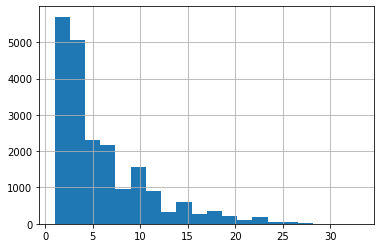

In [34]:
data["floor"].hist(bins=20);

Больше всего объектов расположены до 5 этажа.


* Построим гистограмму для столбца "floors_total"


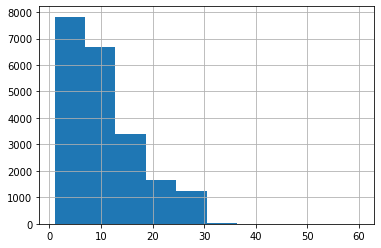

In [35]:
data["floors_total"].hist();

Много объявлений по объектам, расположенных в домах 5-10 этажей, есть объекты и по 60 этажей.


* Построим гистограмму для столбца "ceiling_height"


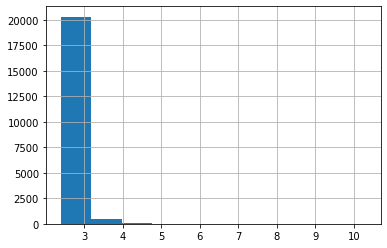

In [36]:

data["ceiling_height"].hist();


Большая часть объектов имеет высоту потолков от 2,4м до 3,2м.


* Построим гистограмму для столбца "rooms"


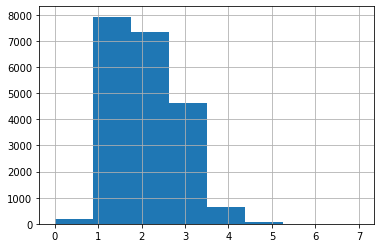

In [37]:

data["rooms"].hist(bins=8);


Больше остальных представлены однокомнатные квартиры, немного отстают двухкомнатные. Есть объекты с 0 комант (возможно, это продажа комнаты, а не квартиры).


* Построим гистограмму для столбца "last_price"


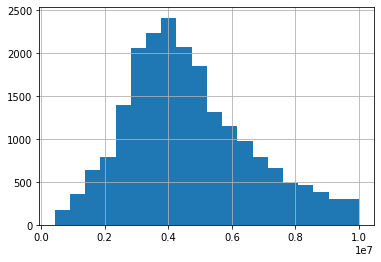

In [38]:

data["last_price"].hist(bins=20);


Большая часть объектов находится в ценовой категории ~4 млн.


* Построим гистограмму для столбца "kitchen_area"


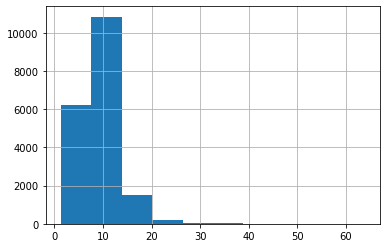

In [39]:

data["kitchen_area"].hist(bins=10);


Наиболее часто встречается площадь кухни в пределах 8-12 кв. метрах


* Построим гистограмму для столбца "living_area"


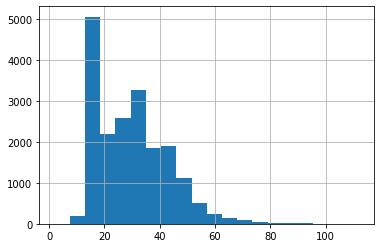

In [40]:

data["living_area"].hist(bins=20);


У большей части объектов жилая площадь небольшая: в районе 20-30 кв.м.


* Построим гистограмму для столбца "total_area"


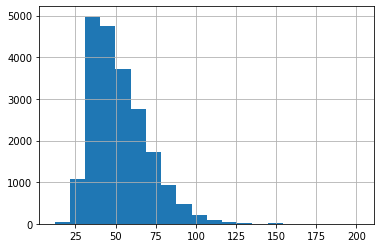

In [41]:

data["total_area"].hist(bins=20);


То же, что и о жилой площади, можно сказать и об общей площади: чаще всего она в пределах 40-50 кв.м.

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

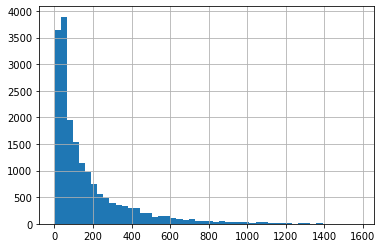

In [42]:
data["days_exposition"].hist(bins=50);

In [43]:
data["days_exposition"].describe()

count    18348.000000
mean       170.756922
std        208.322656
min          1.000000
25%         43.000000
50%         90.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимум объект "висел" 1 день, медиана - 99 дней, т.е. чуть больше 3 месяцев. Т.е. в среднем продажа занимает 3 с небольшим месяца. Есть и продажа за 1580 дней, т.е. больше 4 лет.
Среднее - 185 дней, значительно выше медианы за счет выбросов.
Уменьшим диапазон дней для диаграммы с 1 до 365 дн, отбрасывая чересчур долгие продажи.

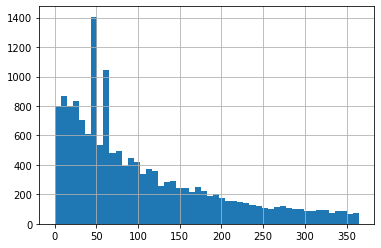

In [44]:
data["days_exposition"].hist(range=(0,365),bins=50);

На этом графике видны интересные выбросы на 40-50 и 60-70 день продаж. То есть большая часть продаж происходит через 1,5 месяца и через 2 месяца после выставления на продажу.

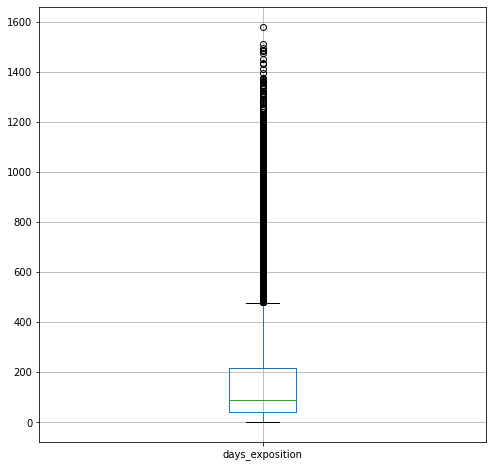

In [45]:
data.boxplot(column='days_exposition', figsize=(8,8));

Удалим выбивающиеся строки.

In [46]:
data = data[data['days_exposition'] < 500]

Выясним, какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут зависимость цены от указанных ниже параметров:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

0.6695632755901225


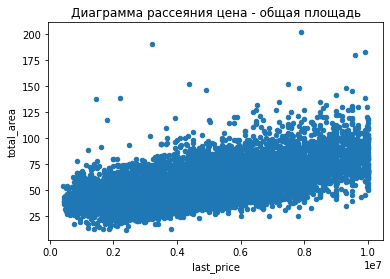

In [47]:
data.plot(x='last_price', y='total_area', kind='scatter', title='Диаграмма рассеяния цена - общая площадь')
print(data['last_price'].corr(data['total_area']))

На диаграмме видна зависимость стоимости от общей площади. Это подтверждается и значением коэффициента Пирсона.

0.5529535111602412


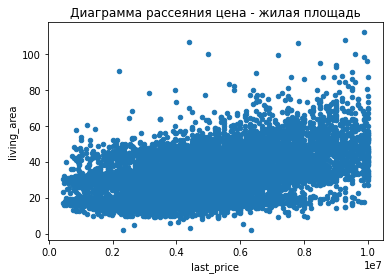

In [48]:
data.plot(x='last_price', y='living_area', kind='scatter', title='Диаграмма рассеяния цена - жилая площадь')
print(data['last_price'].corr(data['living_area']))

На диаграмме видна зависимость стоимости от жилой площади, но она чуть слабее зависимости от общей площади.

0.4430290887311464


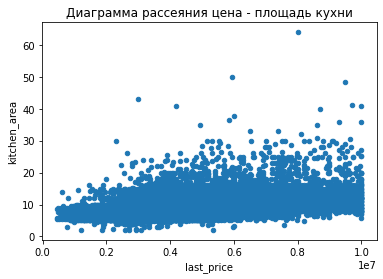

In [49]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', title='Диаграмма рассеяния цена - площадь кухни')
print(data['last_price'].corr(data['kitchen_area']))

Зависимость роста стоимости от роста площади кухни есть, но слабая.

0.4382825077047646
0.8052999073935351


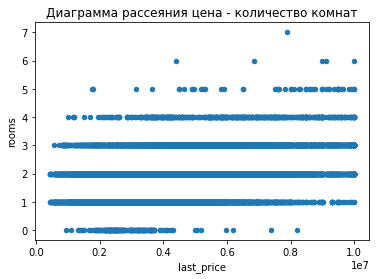

In [50]:
data.plot(x='last_price', y='rooms', kind='scatter', title='Диаграмма рассеяния цена - количество комнат')
print(data['last_price'].corr(data['rooms']))
print(data['total_area'].corr(data['rooms']))

Зависимость стоимости от количества комнат есть, но слабая. Причем зависимость количества комнат и общей площади высокая.

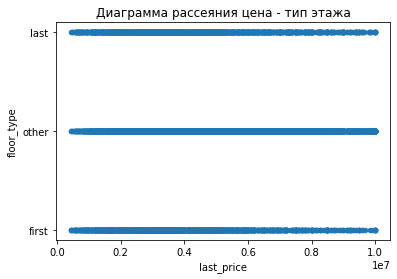

In [51]:
data.plot(x='last_price', y='floor_type', kind='scatter', title='Диаграмма рассеяния цена - тип этажа');

Видно, что объектов с высокой стоимостью меньше на первых и последних этажах, по сравнению с другими этажами.

-0.009037005751063653


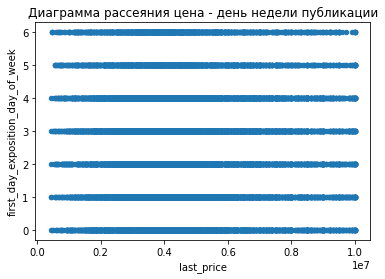

In [52]:
data.plot(x='last_price', y='first_day_exposition_day_of_week', kind='scatter', title='Диаграмма рассеяния цена - день недели публикации')
print(data['last_price'].corr(data['first_day_exposition_day_of_week']))

День публикации не влияет на стоимость объекта.

0.007282342272971354


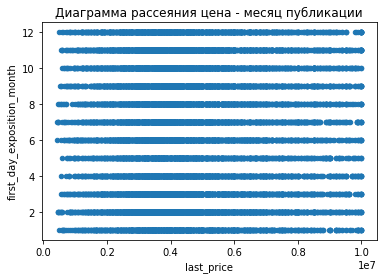

In [53]:
data.plot(x='last_price', y='first_day_exposition_month', kind='scatter', title='Диаграмма рассеяния цена - месяц публикации')
print(data['last_price'].corr(data['first_day_exposition_month']))

Месяц публикации также не влияет на стомость объектов.

0.005698609919114817


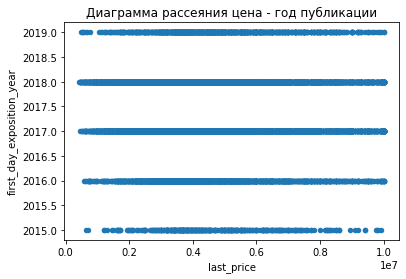

In [54]:
data.plot(x='last_price', y='first_day_exposition_year', kind='scatter', title='Диаграмма рассеяния цена - год публикации')
print(data['last_price'].corr(data['first_day_exposition_year']))

По годам видно, что в 2015 больше было объектов по более низкой цене (относительно выборки за 4 года), затем каждый год росла доля объектов по более выскоим ценам, а в 2019 количество объектов с более низкой ценой немного возросло. Это может говорить и об изменении стоимости квадратного метра, и об уменьшении площади продаваемых объектов.

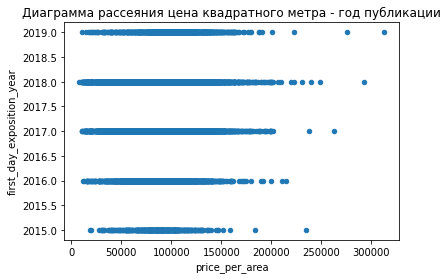

In [55]:
data.plot(x='price_per_area', y='first_day_exposition_year', kind='scatter', title='Диаграмма рассеяния цена квадратного метра - год публикации');

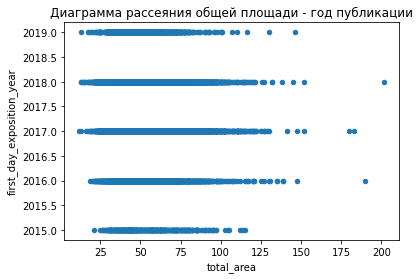

In [56]:
data.plot(x='total_area', y='first_day_exposition_year', kind='scatter', title='Диаграмма рассеяния общей площади - год публикации');

По диаграмме видно, что цена квадратного метра действительно росла с 2015 по 2018, а в 2019 немного отскочила. При этом и общая площадь продаваемых объектов росла с 2015 по 2017, с 2018 стала понемногу снижаться.

**Вывод:**
1. Наибольшая зависимость цены наблюдается от следующих факторов (в порядке убывания): общая площадь, жилая площадь. Площадь кухни и количество комнат имеет слабую корреляцию с ценой.
2. На первом этаже меньше дорогих квартир, чем на последнем, а на последнем меньше, чем на других. 
3. От дня, месяца публикации зависимости нет. По годам видно, что в 2015 цена квадратного метра и площадь продаваемых квартир были ниже, затем каждый год оба параметра росли. В 2018 площадь объектов стала снижаться, в 2019 уменьшилась и цена квадратного метра по сравнению с 2018.

Посчитаем, в каких локациях наибольшее количество объявлений и среднюю цену квадратного метра в них. 
Также выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [57]:
pt = pd.pivot_table(data,
               index=['locality_name'],
               values=['price_per_area'],
               aggfunc=['count', 'mean', 'median'])
# выведем данные по 10 населенным пунктам с наибольшим числом объявлений
display(pt.sort_values(by=('count', 'price_per_area'), ascending=False).head(10))

# выведем населенные пункты самые дешевые и самые дорогие
display(pt.sort_values(by=('median', 'price_per_area')).head())
display(pt.sort_values(by=('median', 'price_per_area'), ascending=False).head())

,count,mean,median
,price_per_area,price_per_area,price_per_area
locality_name,,,
Санкт-Петербург,10746,103382.997318,100042.289259
поселок Мурино,513,85929.958104,86272.475795
поселок Шушары,382,77759.695402,75837.657762
Всеволожск,306,66516.286759,65523.917137
Колпино,291,74499.000791,73529.411765
поселок Парголово,287,89186.224782,91250.000000
деревня Кудрово,264,92567.659816,91901.639344
Пушкин,256,98868.639245,97306.366769


,count,mean,median
,price_per_area,price_per_area,price_per_area
locality_name,,,
деревня Старополье,3,11206.221198,11000.000000
поселок станции Свирь,2,11481.481481,11481.481481
деревня Вахнова Кара,1,11688.311688,11688.311688
деревня Выскатка,2,12335.480902,12335.480902
поселок Совхозный,2,12629.129129,12629.129129


,count,mean,median
,price_per_area,price_per_area,price_per_area
locality_name,,,
поселок Лисий Нос,2,113728.348730,113728.348730
Санкт-Петербург,10746,103382.997318,100042.289259
Кудрово,135,98091.907117,98571.428571
Пушкин,256,98868.639245,97306.366769
Зеленогорск,19,97674.234833,97192.224622


Самая высокая средняя цена квадратного метра, как и ожидалось, в Санкт-Петербурге, там же больше всего объявлений о продаже. Самая низкая цена в деревне Вахнова Кара.

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [58]:
df_spb = data[(data['city_centers_nearest_km'].isna() == False) & (data['locality_name'] == 'Санкт-Петербург')]
pt = pd.pivot_table(df_spb,
               index=['city_centers_nearest_km'],
               values=['price_per_area'],
               aggfunc=['mean'])
display(pt.sort_values(by=('mean', 'price_per_area'), ascending=False))

,mean
,price_per_area
city_centers_nearest_km,
6.0,119135.822285
1.0,118707.564443
5.0,117062.120201
7.0,113700.320962
4.0,112434.849650
8.0,112088.483857
0.0,111429.755790
2.0,110549.668638


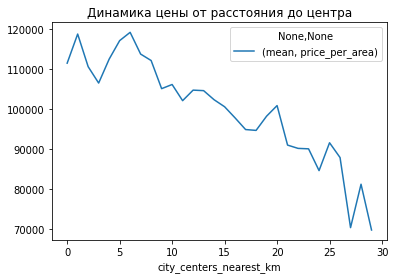

In [59]:
pt.plot(title='Динамика цены от расстояния до центра');

Прослеживается уменьшение цены квадратного метра при удалении от центра. Но при этом видно, что зависимость не линейная, это может быть обусловлено самими объектами (общая площадь, жилая площадь).

## Общий вывод

Были проанализированы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов с 2015 по 2019 год. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. В частности требовалось определить параметры, которые влияют на рыночную стоимость объекта недвижимости для автоматического отслеживания аномалий и мошеннической деятельности.

Данные были проверены на ошибки, аномалии, наличие дублей, пропусков и оценено их влияние на исследование:
1. В данных много пропусков. 
Больше всего пропусков в столбцах с количеством балконов, является ли объект аппартаментами, в столбцах с высотой потолков, расстоянием до ближайшего аэророрта, парка/водоема и с количеством парков/водоемов в радиусе 3 км, значениями жилой плозади и площади кухни, сколько дней объект был выставлен на продажу.
Там, где это было возможно, пропуски заполнены: по количеству балконов, высоте потолков, принадлежности к аппартаментам.
Данные, в которых пропуски восстановить сложно, и они нужны для дальнейшего анализа, были удалены (например, строки с незаполненным населенным пунктом).
2. Есть аномалии.
Больше всего выбросов в столбах с ценой, высотой потолков и количеством дней, которое объект был выставлен на продажу. В случае с ценой явно нарушена размерность в некоторых случаях, то же есть и в столбцах с высотой потолков. Аномалии устранены или удалены строки с ними.
3. Есть неявные дубли.
В столбце с населенным пунктом встречаются неявные дубли, названия населенных пунктов приведены к единому виду.

После предобработки данные были проанализированы на предмет зависимостей и корреляций.
наблюдается наибольшая зависимость цены от следующих факторов: общая площадь и жилая площадь. Площадь кухни и количество комнат имеет слабую корреляцию с ценой. Также на цену влияет расположение объекта: чем ближе к центру Санкт-Петербурга, тем выше цена. Больше всего объявлений в самом Санкт-Петербурге.
На первом этаже меньше дорогих квартир, чем на последнем, а на последнем меньше, чем на других.
От дня, месяца публикации зависимости нет. В 2015 цена квадратного метра и площадь продаваемых квартир были ниже, затем каждый год оба параметра росли. В 2018 площадь объектов стала снижаться, в 2019 уменьшилась и цена квадратного метра по сравнению с 2018. При этом активнее всего продажи идут в декабре, январе и публилкаций больше всего в будние дни, нежели в выходные.

Автоматическая система отслеживания аномалий и мошеннической деятельности должна уметь:
1. Работать с аномальными значениями цены, в том числе опираясь на медианную стоимость квадратного метра в данной локации.
2. Работать с дублями в названиях населенных пунктов.
3. Отслеживать объекты, которые слишком долго находятся на продаже.